# Chicago crime and weather

Let's see if we can combine the data from the previous two sections and analyse them both side by side and see if there is some correlation between temperature and crime rates. (Anyone seen "[Body Heat](https://www.imdb.com/title/tt0082089/)"?)

In [34]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # notice that we're including matplotlibe as well – for some fancier plotting options

## Reading both datasets again

I've gone through the crimes CSV file (using a decent text editor that doesn't crash on huge files, like Emacs) and it turns out we actually haven't gone through all of the 2016 data. The rows are very chaotically ordered. Let's see if we can filter through the file, only select the 2016 data and throw away 
the rest (mainly due to memory constraints of the machines people might want to run these examples on). We're gonna use the `iterator` and `chunksize` options of the `read_csv` function (for such slightly more advanced uses see [the docs](http://pandas.pydata.org/pandas-docs/stable/io.html#csv-text-files)).

First lets define the paths globally, so that later we can skip the serialising step.

In [35]:
crimes_raw_file_path = 'data/chicago_crime/Crimes_-_2001_to_present.csv'
crimes_file_path = 'data/chicago_crime/crimes.csv'

Processing & serialising the crime data

In [36]:
# Debugging
# read the first few rows without parsing
df_peek = pd.read_csv(crimes_raw_file_path, nrows=5)

# print the third column
print(df_peek.iloc[:, 2])


0    03/18/2015 07:44:00 PM
1    03/18/2015 11:00:00 PM
2    03/18/2015 10:45:00 PM
3    03/18/2015 10:30:00 PM
4    03/18/2015 09:00:00 PM
Name: Date, dtype: object


In [37]:
chunksize = 100_000
df_chunks = []

for df in pd.read_csv(
    crimes_raw_file_path,
    parse_dates=[2],
    index_col=[2],
    chunksize=chunksize,
    iterator=True,
    low_memory=True,
    date_parser=lambda x: pd.to_datetime(x, format="%m/%d/%Y %I:%M:%S %p")
):
    # sort index before slicing
    df = df.sort_index()
    
    # slice using ISO format (yyyy-mm-dd)
    df = df['2016-01-01':'2016-12-31']
    
    df_chunks.append(df)

# combine
crimes2016 = pd.concat(df_chunks)

# final sort for stability
crimes2016 = crimes2016.sort_index()

# save
crimes2016.to_csv(crimes_file_path)

# preview
print(crimes2016.head())


C:\Users\patxg\AppData\Local\Temp\ipykernel_8540\737760286.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  for df in pd.read_csv(


                  ID Case Number                    Block  IUCR  \
Date                                                              
2016-01-01  10519991    HZ262045    023XX N SPAULDING AVE  1752   
2016-01-01  10410539    HZ147431       060XX S RHODES AVE  0266   
2016-01-01  10436653    HZ174254       051XX S PAULINA ST  1130   
2016-01-01  10501254    HZ240963      005XX N LARAMIE AVE  1752   
2016-01-01  10457853    HZ196958  029XX N SPRINGFIELD AVE  0266   

                          Primary Type                    Description  \
Date                                                                    
2016-01-01  OFFENSE INVOLVING CHILDREN  AGG CRIM SEX ABUSE FAM MEMBER   
2016-01-01         CRIM SEXUAL ASSAULT                      PREDATORY   
2016-01-01          DECEPTIVE PRACTICE       FRAUD OR CONFIDENCE GAME   
2016-01-01  OFFENSE INVOLVING CHILDREN  AGG CRIM SEX ABUSE FAM MEMBER   
2016-01-01         CRIM SEXUAL ASSAULT                      PREDATORY   

           Locatio

Now we can quickly deserialise the crimes data.

In [38]:
# parsing weather data and also kick out some unnecessary 2017 values
crimes2016 = pd.read_csv(crimes_file_path, index_col=0, parse_dates=True)
crimes2016.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,10519991,HZ262045,023XX N SPAULDING AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,APARTMENT,False,False,1413,...,35.0,22.0,20,1153765.0,1915260.0,2016,02/10/2018 03:50:01 PM,41.923311,-87.710436,"(41.923310818, -87.710435775)"
2016-01-01,10410539,HZ147431,060XX S RHODES AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,APARTMENT,False,False,313,...,20.0,42.0,02,1180959.0,1865034.0,2016,02/10/2018 03:50:01 PM,41.784902,-87.612066,"(41.784902127, -87.612066361)"
2016-01-01,10436653,HZ174254,051XX S PAULINA ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,APARTMENT,False,False,932,...,16.0,61.0,11,1165879.0,1870646.0,2016,02/10/2018 03:50:01 PM,41.800636,-87.667197,"(41.800635964, -87.667196557)"
2016-01-01,10501254,HZ240963,005XX N LARAMIE AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,1523,...,28.0,25.0,20,1141611.0,1902863.0,2016,02/10/2018 03:50:01 PM,41.889526,-87.755401,"(41.889525629, -87.755401321)"
2016-01-01,10457853,HZ196958,029XX N SPRINGFIELD AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,2523,...,30.0,21.0,02,1149879.0,1919291.0,2016,02/10/2018 03:50:01 PM,41.934449,-87.724609,"(41.934448806, -87.724609278)"


Great! Now that we have the crime data in memory, let's read the weather data – the same way we've already read it in the last section.

In [39]:
weather_file_path = 'data/chicago_weather/weather.csv'

# read with parse_dates
weather_df = pd.read_csv(weather_file_path, index_col=0, parse_dates=True)

# sort so slicing is safe
weather_df = weather_df.sort_index()

# slice
weather2016 = weather_df['2016-01-01':'2016-12-31']

# preview
print(weather2016.temperature.head())


2016-01-01 00:00:00   -4.42
2016-01-01 01:00:00   -5.12
2016-01-01 02:00:00   -5.93
2016-01-01 03:00:00   -6.61
2016-01-01 04:00:00   -6.98
Name: temperature, dtype: float64


## Plotting the data side by side

Let's group both datasets to a daily frequency and plot them side-by-side.

In [40]:
weather2016.temperature.resample('D').mean().plot()

<Axes: >

In [41]:
crimes2016['Primary Type'].resample('D').count().plot()

<Axes: xlabel='Date'>

Let's simplify these variables

In [42]:
daily_temperature = weather2016.temperature.resample('D').mean()
daily_crimes = crimes2016['Primary Type'].resample('D').count()
daily_crimes.name = 'crimes'

We could plot them on the same graph

In [43]:
daily_temperature.plot()
daily_crimes.plot()
plt.legend()

But due to different y-axis dimensions, the data is not very readable (and these types of plots generally aren't recommended if we're plotting different data).

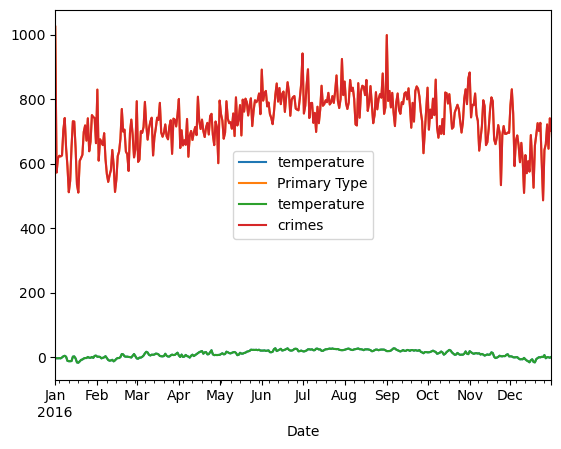

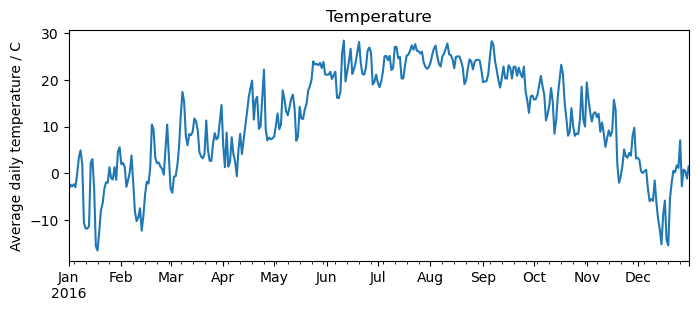

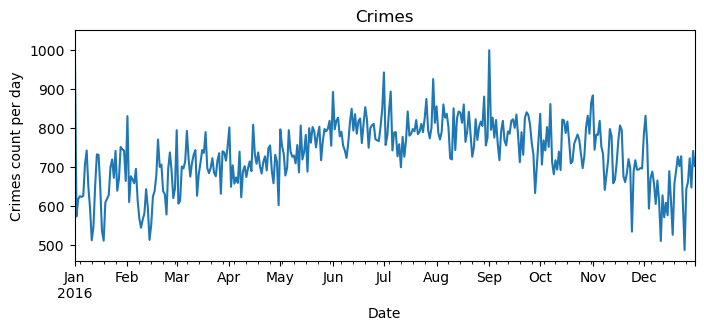

In [44]:
figsize = (8,3)
plt.figure()
daily_temperature.plot(title='Temperature', figsize=figsize)
plt.ylabel('Average daily temperature / C')
plt.figure()
daily_crimes.plot(title='Crimes', figsize=figsize)
plt.ylabel('Crimes count per day')
plt.show()

We can use a rolling average function to "smoothen" out the curve and see the trend change throught a year.

In [45]:
daily_crimes.rolling(10).mean().plot()

<Axes: xlabel='Date'>

… and why not use our knowledge of interactive widgets to make the moving window size adjustable.

In [46]:
from ipywidgets import interact, widgets

@interact(periods=widgets.IntSlider(min=10,max=100,step=10,value=50))
def plot_moving_average(periods=50):
    figsize = (8,3)
    plt.figure()
    daily_temperature.rolling(periods).mean().plot(title='Temperature', figsize=figsize)
    plt.ylabel('Average daily temperature / C')
    plt.figure()
    daily_crimes.rolling(periods).mean().plot(title='Crimes', figsize=figsize)
    plt.ylabel('Crimes count per day')
    plt.show()

interactive(children=(IntSlider(value=50, description='periods', min=10, step=10), Output()), _dom_classes=('w…

## Computing the correlation

It's easier to visualise and analyse the data correlation if we combine temperatures and crimes into a single DataFrame.

In [47]:
daily_df = pd.DataFrame({'crimes': daily_crimes, 'temperature': daily_temperature})
daily_df.head()

,crimes,temperature
2016-01-01,1025,-3.589167
2016-01-02,573,-2.371667
2016-01-03,617,-2.781667
2016-01-04,625,-2.335417
2016-01-05,623,-2.937083


Now we can generate a scatter plot showing both variables as dimensions with a single command.

In [48]:
daily_df.plot(kind='scatter', x='temperature', y='crimes')

<Axes: xlabel='temperature', ylabel='crimes'>

This scatter plot pretty cleanly shows that there is some correlation between temperature and the number of crimes. Let's compute it.

In [49]:
daily_df.corr() # Pearson correlation by default – the standard correlation coefficient

,crimes,temperature
crimes,1.000000,0.734767
temperature,0.734767,1.000000


The scatter plot also shows some interesting outliers – what's the story with this time the crime rate went over 1000? Let's find out the date…

In [50]:
daily_df[daily_df.crimes > 1000]

,crimes,temperature
2016-01-01,1025,-3.589167


OK, it seems that New Year's celebrations can be quite busy for police officers.

### Linear Regression Model

Let's compute a [linear regression model](https://en.wikipedia.org/wiki/Linear_regression) – a funciton of the form $f(x) = ax + b$ that attemts to estimate the crime rate based on temperature. We're gonna use the [StatsModels](https://www.statsmodels.org/dev/index.html) package which includes some useful statistical functions.

In [51]:
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot

# regress "crimes" onto "temperature" (plus an intercept)
model = sm.OLS(daily_df.crimes, sm.add_constant(daily_df.temperature))
model_results = model.fit()
print(model_results.params)
print(model_results.summary())

const          669.616570
temperature      5.510943
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 crimes   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     427.1
Date:                Thu, 03 Jul 2025   Prob (F-statistic):           2.49e-63
Time:                        22:07:39   Log-Likelihood:                -1989.6
No. Observations:                 366   AIC:                             3983.
Df Residuals:                     364   BIC:                             3991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

This model lets us forecast the crime rate based on temperature. Say that the long-term weather forecast says it's gonna be 28 C on average this summer in Chicago (global warming and all that…) and during the winter temperature is going to average 5 C. This is what our models says the crime rate would be for those two seasons – maybe the city of Chicago can plan to adapt the number of police officer patrols accordingly…

In [52]:
model_results.predict(sm.add_constant(pd.Series([28, 5])))

0    823.922971
1    697.171284
dtype: float64

Of couirse, take such predictions with a grain of salt – as our scatter plot tells us, there is still quite a lot of 
variance in our data. This is more to show you the different ways we can use linear regression models.

One other neat thing we can do is to illustrate our linear regression model by plotting it over our scatter plot of actual data.

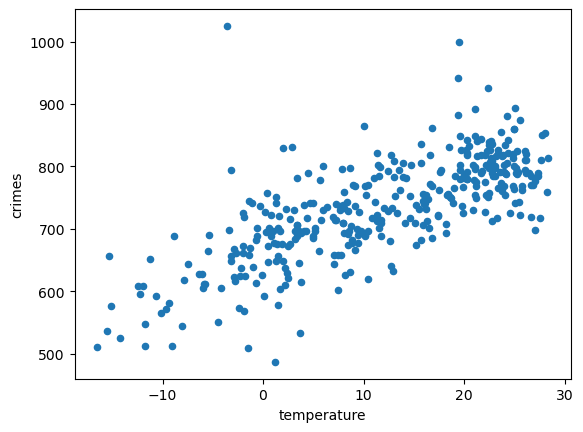

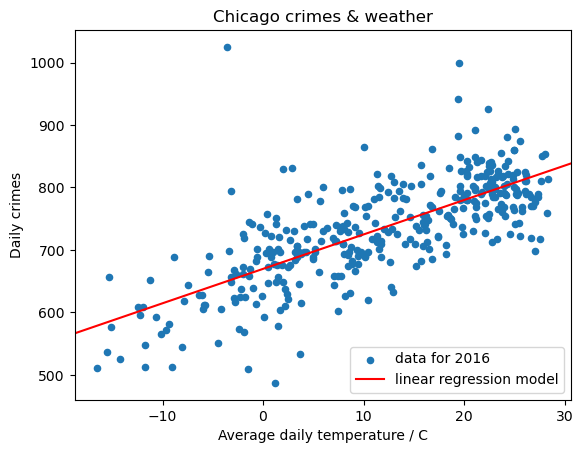

In [53]:
ax = daily_df.plot(kind='scatter', x='temperature', y='crimes', label='data for 2016')

# plot regression line
abline_plot(model_results=model_results, ax=ax, color='red', label='linear regression model')

plt.title('Chicago crimes & weather')
plt.ylabel('Daily crimes')
plt.xlabel('Average daily temperature / C')
plt.legend()
plt.show()

### Correlation Matrix

In the previous example we've only looked at temperatures and overall crimes. **Can we split the data into various different crime types?**

First, we repeat the procedure we've already explained to group crimes by type, count the occurrences per hour and split them into different columns.

In [54]:
crimes_mi = crimes2016.set_index(['Primary Type'], append=True)
crimes_mi['ocurrences'] = np.ones(len(crimes_mi), dtype=int)
crimes_grouped = crimes_mi.ocurrences.groupby(level=[0,1]).sum()
crimes_by_type = crimes_grouped.unstack(level=1).fillna(0).resample('h').sum().fillna(0).astype(int)
crimes_by_type.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0,4,21,2,0,24,24,0,46,0,...,0,11,0,0,0,1,34,0,19,2
2016-01-01 01:00:00,0,3,22,2,0,2,6,1,1,0,...,0,0,0,0,0,3,2,0,10,0
2016-01-01 02:00:00,0,5,29,0,0,0,9,0,3,0,...,0,1,0,0,1,1,0,0,11,1
2016-01-01 03:00:00,1,3,21,1,0,0,4,0,4,0,...,0,2,0,0,0,2,0,0,4,1
2016-01-01 04:00:00,0,1,11,0,0,1,5,0,4,0,...,0,1,0,0,0,1,0,0,6,0


Now we add the temperature column.

In [55]:
hourly_df = crimes_by_type
hourly_df['temperature'] = weather2016.temperature.values
hourly_df.tail()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,temperature
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-31 19:00:00,0,3,4,4,0,0,6,1,0,0,...,2,0,0,0,6,0,0,1,0,-1.22
2016-12-31 20:00:00,0,5,7,4,0,0,8,1,0,0,...,1,0,0,0,2,0,0,3,0,-2.01
2016-12-31 21:00:00,0,2,7,0,0,0,4,1,0,0,...,5,0,0,0,2,0,0,8,2,-2.63
2016-12-31 22:00:00,0,1,10,3,0,3,8,2,0,0,...,3,0,0,1,1,0,0,4,0,-3.03
2016-12-31 23:00:00,0,1,14,3,0,1,5,0,1,0,...,1,0,0,0,3,0,0,10,3,-3.64


To print the correlation matrix we just call the `corr` method and add [some styling](https://pandas.pydata.org/pandas-docs/stable/style.html).

In [31]:
corr = hourly_df.corr()
# hourly_df.corrwith(weather2016.temperature)
corr.style.background_gradient()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,temperature
Primary Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARSON,1.000000,-0.039751,0.011283,-0.034237,0.006364,0.037223,0.010196,-0.020014,-0.045248,-0.003399,0.038017,-0.008392,0.009696,0.007614,-0.005633,0.024222,-0.009696,-0.037787,0.013600,-0.011583,-0.002529,0.010601,-0.001244,-0.004130,-0.035523,0.019941,0.005619,-0.000352,0.033412,-0.007892,-0.007025,-0.059029,0.007586,0.005191
ASSAULT,-0.039751,1.000000,0.280115,0.136462,0.006224,-0.020029,0.184900,0.188681,0.208213,0.068104,0.026564,0.019026,0.079883,0.049644,0.028622,0.029103,0.114661,0.255551,0.000903,0.025286,-0.006775,0.014819,0.072669,-0.011065,0.266247,0.049136,-0.002508,0.136378,0.097852,0.028675,0.023057,0.406392,0.117954,0.251570
BATTERY,0.011283,0.280115,1.000000,0.033465,-0.000578,0.101720,0.339054,0.135699,0.084141,0.081333,0.075401,-0.004833,0.128288,0.014117,0.015762,0.075517,0.164800,0.175127,-0.008110,-0.003922,0.004114,0.025518,0.084313,0.025155,0.171126,0.081484,-0.005350,0.137277,0.201526,0.074332,0.026699,0.318172,0.209833,0.239284
BURGLARY,-0.034237,0.136462,0.033465,1.000000,0.001808,-0.010305,0.066717,0.066887,0.194695,0.001391,-0.002943,0.011537,0.003031,0.043129,0.008110,-0.034127,0.080817,0.075682,0.012950,0.026059,0.002796,0.015435,0.033274,-0.004602,0.160228,-0.025758,-0.012469,0.033311,0.026440,0.023608,0.017295,0.203237,0.026772,0.104080
CONCEALED CARRY LICENSE VIOLATION,0.006364,0.006224,-0.000578,0.001808,1.000000,0.002636,-0.004578,0.008143,0.036049,0.002696,-0.001108,-0.002272,0.006241,-0.007897,0.002016,0.044137,0.021539,0.000602,-0.001531,-0.004805,-0.000685,-0.004736,0.006160,-0.001118,0.022287,0.019220,-0.002166,0.013668,0.014920,0.017783,0.003667,0.006879,-0.008098,0.006556
CRIM SEXUAL ASSAULT,0.037223,-0.020029,0.101720,-0.010305,0.002636,1.000000,0.121275,-0.016081,0.145826,-0.001147,0.042675,0.057116,0.006492,0.050875,-0.007334,0.029261,0.037219,-0.026701,-0.008074,-0.004461,-0.003610,0.200611,0.469169,-0.005896,0.038937,0.032628,-0.004834,0.007251,0.041715,0.433565,0.018862,0.014398,0.044114,0.026497
CRIMINAL DAMAGE,0.010196,0.184900,0.339054,0.066717,-0.004578,0.121275,1.000000,0.122859,0.049530,0.066574,0.062026,0.004264,0.114386,0.012737,0.000847,0.053038,0.211250,0.153637,-0.013331,0.009603,-0.006856,0.050175,0.124407,-0.007541,0.138632,0.082400,-0.014608,0.113836,0.178767,0.101147,0.023349,0.274837,0.197756,0.181509
CRIMINAL TRESPASS,-0.020014,0.188681,0.135699,0.066887,0.008143,-0.016081,0.122859,1.000000,0.091110,0.059170,0.005101,0.007450,0.057303,0.017132,0.022208,0.009150,0.093351,0.149368,0.012670,0.008104,0.015070,-0.006231,0.024476,0.015012,0.143128,0.023067,0.006765,0.068873,0.066477,0.016874,0.013985,0.222399,0.100394,0.115455
DECEPTIVE PRACTICE,-0.045248,0.208213,0.084141,0.194695,0.036049,0.145826,0.049530,0.091110,1.000000,0.016423,-0.023139,0.073551,-0.000999,0.076261,0.015957,-0.017195,0.036418,0.117642,0.015678,0.054430,-0.004601,0.072097,0.264798,-0.005821,0.349062,-0.039074,0.009059,0.042006,-0.009471,0.222394,0.046953,0.333579,0.023616,0.076507


From the correlation matrix we can see that not all types of crime are equally correlated with temperature. To show the types that have the highest correlation, let's sort just the temperature column.

In [56]:
corr = hourly_df.corr().loc[:,['temperature']].sort_values(ascending=False, by='temperature')
corr.style.background_gradient()

Primary Type,temperature
Primary Type,
temperature,1.000000
THEFT,0.282797
ASSAULT,0.251570
BATTERY,0.239284
CRIMINAL DAMAGE,0.181509
OTHER OFFENSE,0.123510
WEAPONS VIOLATION,0.122603
CRIMINAL TRESPASS,0.115455
GAMBLING,0.107314


At first glance, it might seem that theft, assault, battery and criminal damage might be more related to outside temperature than, say, kidnapping or motor vehicle theft. That might not necessarily be the case, though – if we count the crime types we can see that the most correlated types are also the most frequent ones. It could be that we simply have insufficient data to show any correlation patterns for other crime types.

In [57]:
crimes_by_type.sum().sort_values(ascending=False)

Primary Type
temperature                          101885.53
THEFT                                 61570.00
BATTERY                               50282.00
CRIMINAL DAMAGE                       31018.00
ASSAULT                               18732.00
DECEPTIVE PRACTICE                    18530.00
OTHER OFFENSE                         17255.00
BURGLARY                              14287.00
NARCOTICS                             13273.00
ROBBERY                               11960.00
MOTOR VEHICLE THEFT                   11294.00
CRIMINAL TRESPASS                      6308.00
WEAPONS VIOLATION                      3449.00
OFFENSE INVOLVING CHILDREN             2295.00
PUBLIC PEACE VIOLATION                 1606.00
CRIM SEXUAL ASSAULT                    1523.00
SEX OFFENSE                             965.00
INTERFERENCE WITH PUBLIC OFFICER        936.00
PROSTITUTION                            800.00
HOMICIDE                                780.00
ARSON                                   516.00


### Homework: other weather variables

As a homework assignment, consider computing the correlation matrix for other weather variables we have collected. Is temperature the best indicator of the daily crime rate?

In [58]:
weather2016.columns

Index(['apparentTemperature', 'cloudCover', 'dewPoint', 'humidity', 'icon',
       'precipAccumulation', 'precipIntensity', 'precipProbability',
       'precipType', 'pressure', 'summary', 'temperature', 'time', 'uvIndex',
       'visibility', 'windBearing', 'windGust', 'windSpeed'],
      dtype='object')

## Hourly data

Another interesting question to ask the data is – what time of day do most accidents happen?

In [59]:
crimes_by_hour = crimes_by_type.groupby(crimes_by_type.index.hour).sum()
crimes_by_hour

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,temperature
Date,,,,,,,,,,,,,,,,,,,,,
0,36,546,2486,576,3,230,1765,214,1744,3,...,810,34,0,41,633,149,10,2343,179,3553.31
1,40,443,2264,377,0,89,1190,166,238,1,...,397,14,0,47,583,24,6,1445,106,3429.34
2,33,375,2087,371,2,105,1072,149,187,1,...,294,59,0,26,502,22,3,1226,66,3327.14
3,43,313,1694,348,1,95,924,110,164,0,...,225,35,0,23,469,28,4,957,70,3240.30
4,38,212,1300,329,1,60,778,87,129,0,...,168,4,1,15,399,21,3,779,37,3167.63
5,34,211,923,372,1,51,618,85,117,0,...,155,3,1,7,314,13,2,739,30,3115.30
6,23,264,876,426,2,44,711,115,136,0,...,247,12,0,9,237,18,3,989,29,3218.52
7,19,485,1126,703,1,31,827,212,325,1,...,441,5,1,24,249,37,7,1443,36,3501.79
8,10,657,1538,872,3,28,1050,196,958,1,...,713,11,0,31,270,43,8,2157,60,3897.24


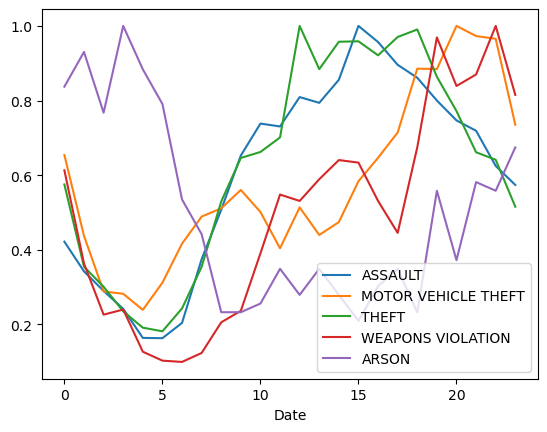

In [60]:
columns = ['ASSAULT', 'MOTOR VEHICLE THEFT', 'THEFT', 'WEAPONS VIOLATION', 'ARSON']
(crimes_by_hour.loc[:, columns] / crimes_by_hour.loc[:, columns].max()).plot()
plt.legend()
plt.show()